[[ 50. -25.   0.   0.]
 [-25.  50. -25.   0.]
 [  0. -25.  50. -25.]
 [  0.   0. -25.  50.]]


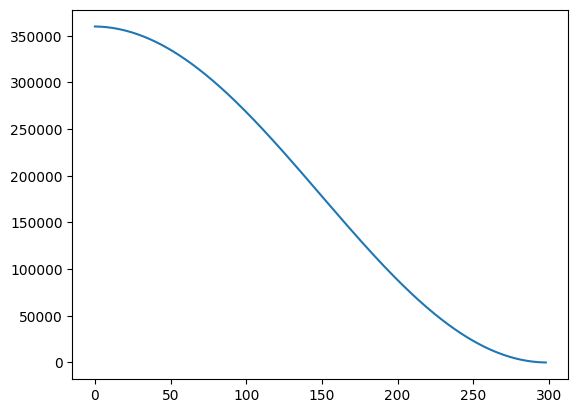

In [22]:
from scipy.sparse import diags
import scipy as sp
import matplotlib.pyplot as plt

def poisson(n): return n**2*diags([-1,2,-1],[-1,0,1],(n-1,n-1))

print(poisson(5).toarray())
eig = sp.linalg.eig(poisson(300).toarray())
q = sorted(eig[0])[::-1]

plt.plot(range(len(q)),q)
plt.show()

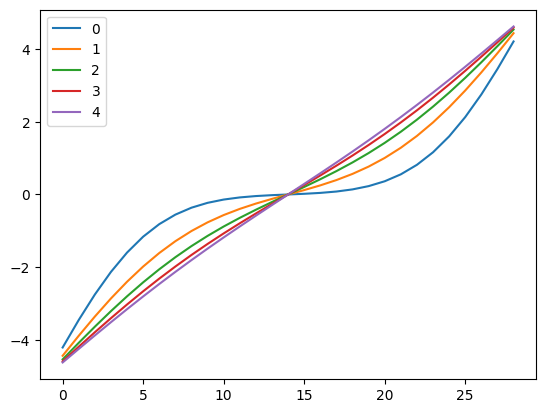

In [46]:
import numpy as np
from scipy.sparse import spdiags
from scipy.sparse import eye
from scipy.sparse.linalg import inv

def wjacobi(v0,A,f,nu,w):
    n = A.shape[0]+1
    D = spdiags(A.diagonal(),[0],(n-1,n-1)) 
    Rw = eye(n-1)-w*inv(D)@A
    ff =  w*inv(D)@f
    for _ in range(nu):
        v0 = Rw@v0 +ff
    return v0
n = 30
A =poisson(n)
v0 = np.zeros(n-1)
f = np.zeros(n-1)
f[0]=-5*n**2
f[-1]=5*n**2
nu = 50
omega = 0.5
sol = v0
for i in range(5):
    sol = wjacobi(sol,A,f,nu,omega)
    plt.plot(range(len(sol)),sol,label =i)
plt.legend()
plt.show()